In [1]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## Importing the CSV dataset
df = pd.read_csv("all_month.csv")

In [3]:
# Have a look to the first 7 rows
df.head(7)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.171300,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
5,2023-01-22T01:39:22.975Z,61.718800,-147.698300,31.60,1.60,ml,NaN,NaN,NaN,1.09,...,2023-01-22T01:41:06.653Z,"10 km SSW of Glacier View, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
6,2023-01-22T01:34:08.410Z,38.780335,-122.763664,1.36,1.56,md,28.0,71.0,0.009736,0.04,...,2023-01-22T02:07:12.146Z,"1km WNW of The Geysers, CA",earthquake,0.23,0.34,0.150,28.0,automatic,nc,nc


In [4]:
# Checking the Nulls (blanks) the dataset has 
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

In [5]:
# Getting the basic statistics
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9410.000000,9410.000000,9410.000000,9409.000000,6823.000000,6822.000000,5053.000000,9410.000000,6347.000000,9410.000000,6745.000000,6810.000000
mean,40.694347,-117.863831,25.593011,1.645013,23.403635,119.461838,0.747333,0.294069,1.698991,2.083547,0.276723,15.534655
std,20.430642,66.380624,54.697555,1.230108,22.145048,62.376305,2.697378,0.276421,3.095408,15.786392,0.477658,23.290696
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.431417,-154.926417,2.972500,0.890000,9.000000,70.000000,0.014850,0.090000,0.260000,0.420000,0.110000,5.000000
50%,38.830166,-122.852837,9.125811,1.430000,17.000000,106.000000,0.063090,0.176600,0.440000,0.710000,0.169000,9.000000
75%,58.247167,-116.722042,25.296000,2.100000,31.000000,157.000000,0.196200,0.470000,0.860000,1.400000,0.248000,18.000000
max,82.000600,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,768.000000


In [6]:
# Checking the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9410 non-null   object 
 1   latitude         9410 non-null   float64
 2   longitude        9410 non-null   float64
 3   depth            9410 non-null   float64
 4   mag              9409 non-null   float64
 5   magType          9409 non-null   object 
 6   nst              6823 non-null   float64
 7   gap              6822 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9410 non-null   float64
 10  net              9410 non-null   object 
 11  id               9410 non-null   object 
 12  updated          9410 non-null   object 
 13  place            9410 non-null   object 
 14  type             9410 non-null   object 
 15  horizontalError  6347 non-null   float64
 16  depthError       9410 non-null   float64
 17  magError      

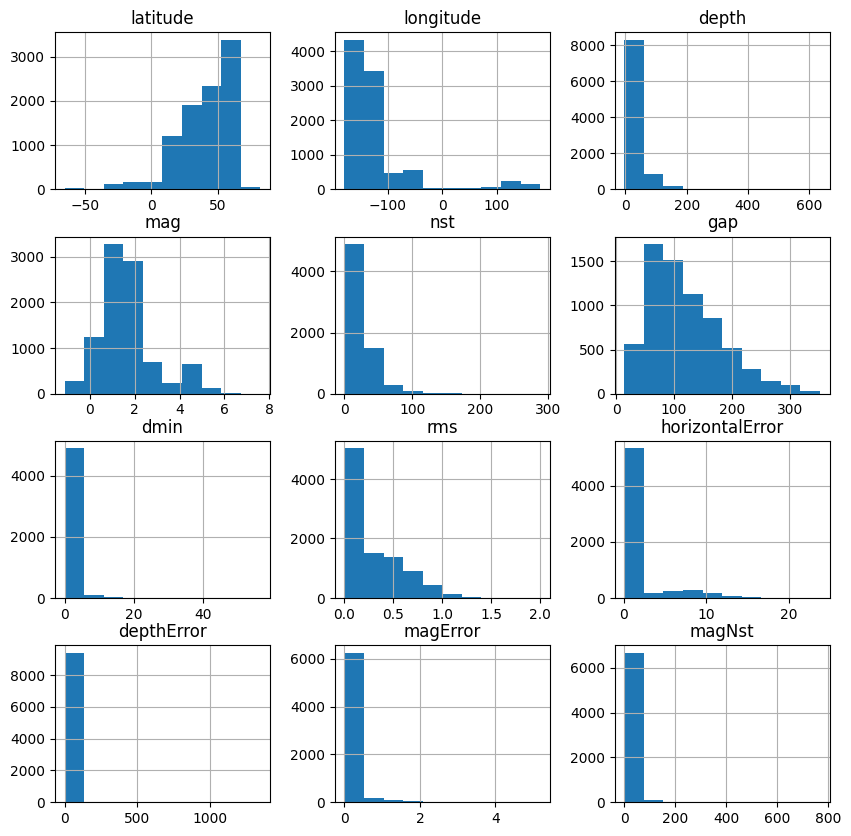

In [7]:
# I want to extract some insights from the dataset. In order to make action on this I need to clean the data first, so I can replace the blanks with either the mean or the median
# First, I need to plot histograms
df.hist(bins= 10, figsize= (10,10))
plt.show()

In [8]:
# After histograms, I want to replace the missing values (using medians because none of them are Normal distributed)
df['mag'] = df['mag'].fillna(df['mag'].median())
df['nst'] = df['nst'].fillna(df['nst'].median())
df['gap'] = df['gap'].fillna(df['gap'].median())
df['dmin'] = df['dmin'].fillna(df['dmin'].median())
df['horizontalError'] = df['horizontalError'].fillna(df['horizontalError'].median())
df['magError'] = df['magError'].fillna(df['magError'].median())
df['magNst'] = df['magNst'].fillna(df['magNst'].median())

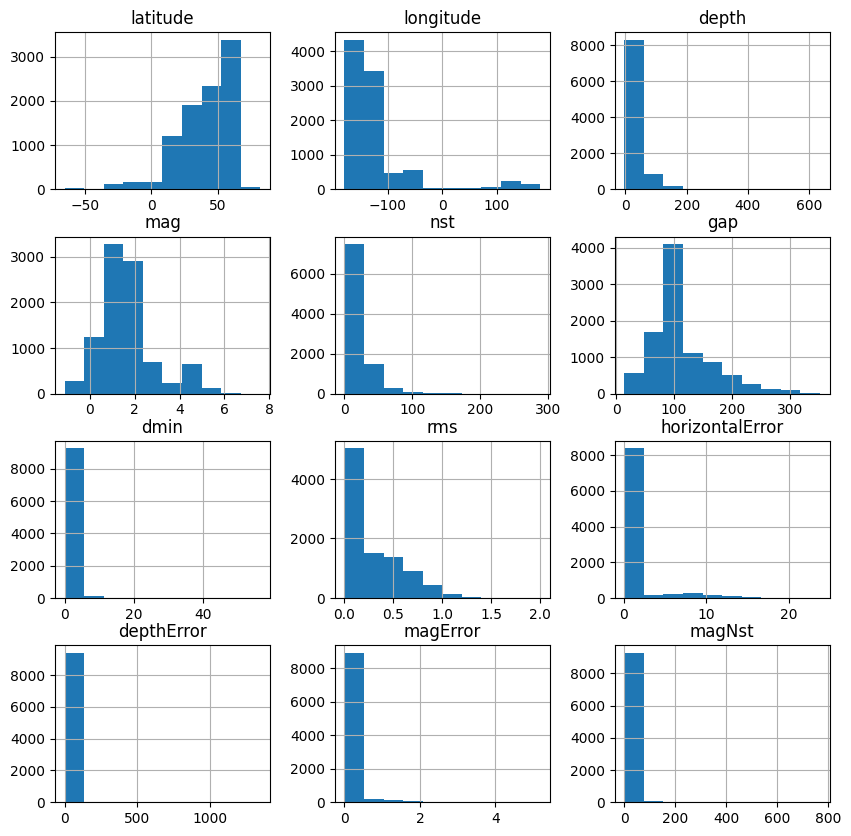

In [9]:
# Checking the variables that have suffered a replacement in their missing values with the median to see how different their hist look like
df.hist(bins= 10, figsize= (10,10))
plt.show()

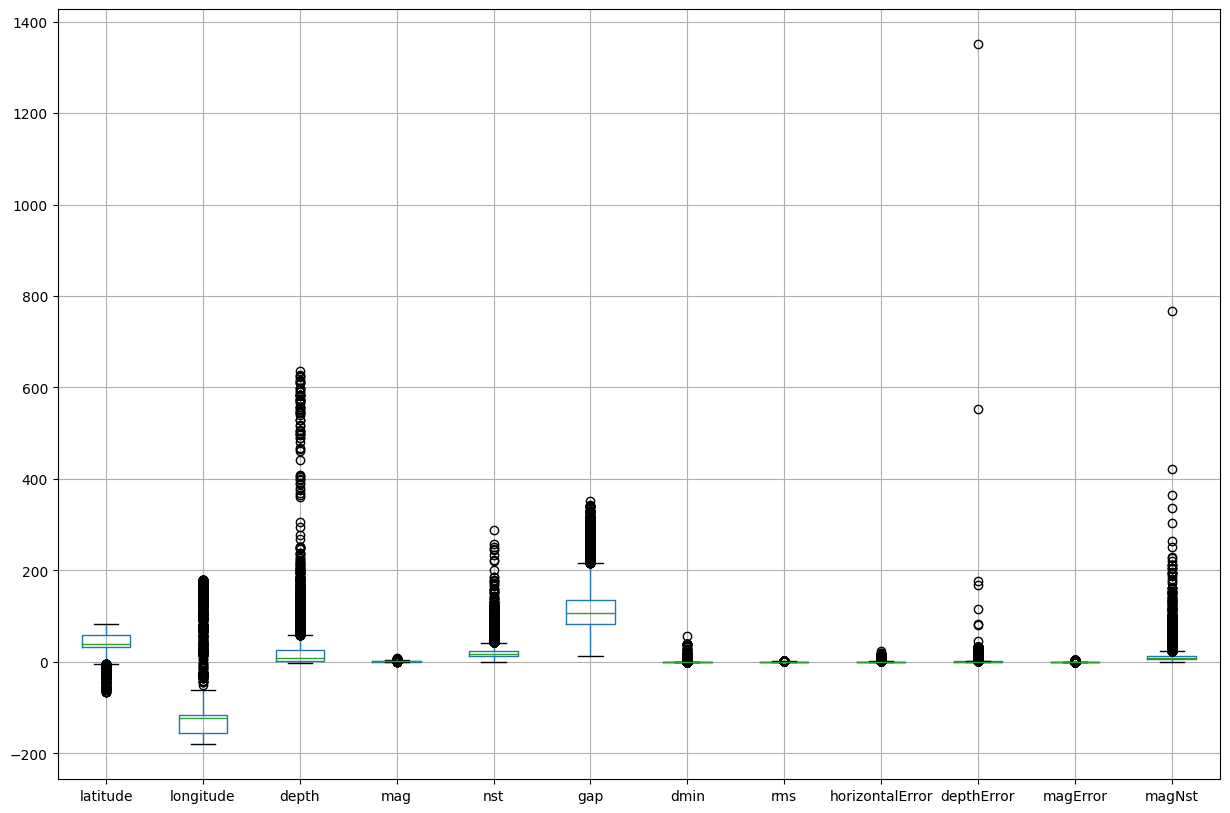

In [10]:
## Checking out the outliers
df.boxplot(figsize=(15,10))
plt.show()

In [11]:
## Removing outliers from latitude, longitude, depth, mag, nst, gap, dmin, rms, horizontalError, depthError, magError, magNst

## remove outliers in latitude column
max_threshold, min_threshold = df['latitude'].quantile([0.75, 0.25])
EarthquakeData = df[(df.latitude > min_threshold) & (df.latitude < max_threshold)]

## remove outliers in longitude column
max_threshold, min_threshold = df['longitude'].quantile([0.75, 0.25])
EarthquakeData = df[(df.longitude > min_threshold) & (df.longitude < max_threshold)]

## remove outliers in depth column
max_threshold, min_threshold = df['depth'].quantile([0.75, 0.25])
EarthquakeData = df[(df.depth > min_threshold) & (df.depth < max_threshold)]

## remove outliers in mag column
max_threshold, min_threshold = df['mag'].quantile([0.75, 0.25])
EarthquakeData = df[(df.mag > min_threshold) & (df.mag < max_threshold)]

## remove outliers in nst column
max_threshold, min_threshold = df['nst'].quantile([0.75, 0.25])
EarthquakeData = df[(df.nst > min_threshold) & (df.nst < max_threshold)]

## remove outliers in gap column
max_threshold, min_threshold = df['gap'].quantile([0.75, 0.25])
EarthquakeData = df[(df.gap > min_threshold) & (df.gap < max_threshold)]

## remove outliers in dmin column
max_threshold, min_threshold = df['dmin'].quantile([0.75, 0.25])
EarthquakeData = df[(df.dmin > min_threshold) & (df.dmin < max_threshold)]

## remove outliers in rms column
max_threshold, min_threshold = df['rms'].quantile([0.75, 0.25])
EarthquakeData = df[(df.rms > min_threshold) & (df.rms < max_threshold)]

## remove outliers in horizontalError column
max_threshold, min_threshold = df['horizontalError'].quantile([0.75, 0.25])
EarthquakeData = df[(df.horizontalError > min_threshold) & (df.horizontalError < max_threshold)]

## remove outliers in depthError column
max_threshold, min_threshold = df['depthError'].quantile([0.75, 0.25])
EarthquakeData = df[(df.depthError > min_threshold) & (df.depthError < max_threshold)]

## remove outliers in magError column
max_threshold, min_threshold = df['magError'].quantile([0.75, 0.25])
EarthquakeData = df[(df.magError > min_threshold) & (df.magError < max_threshold)]

## remove outliers in magNst column
max_threshold, min_threshold = df['magNst'].quantile([0.75, 0.25])
EarthquakeData = df[(df.magNst > min_threshold) & (df.magNst < max_threshold)]

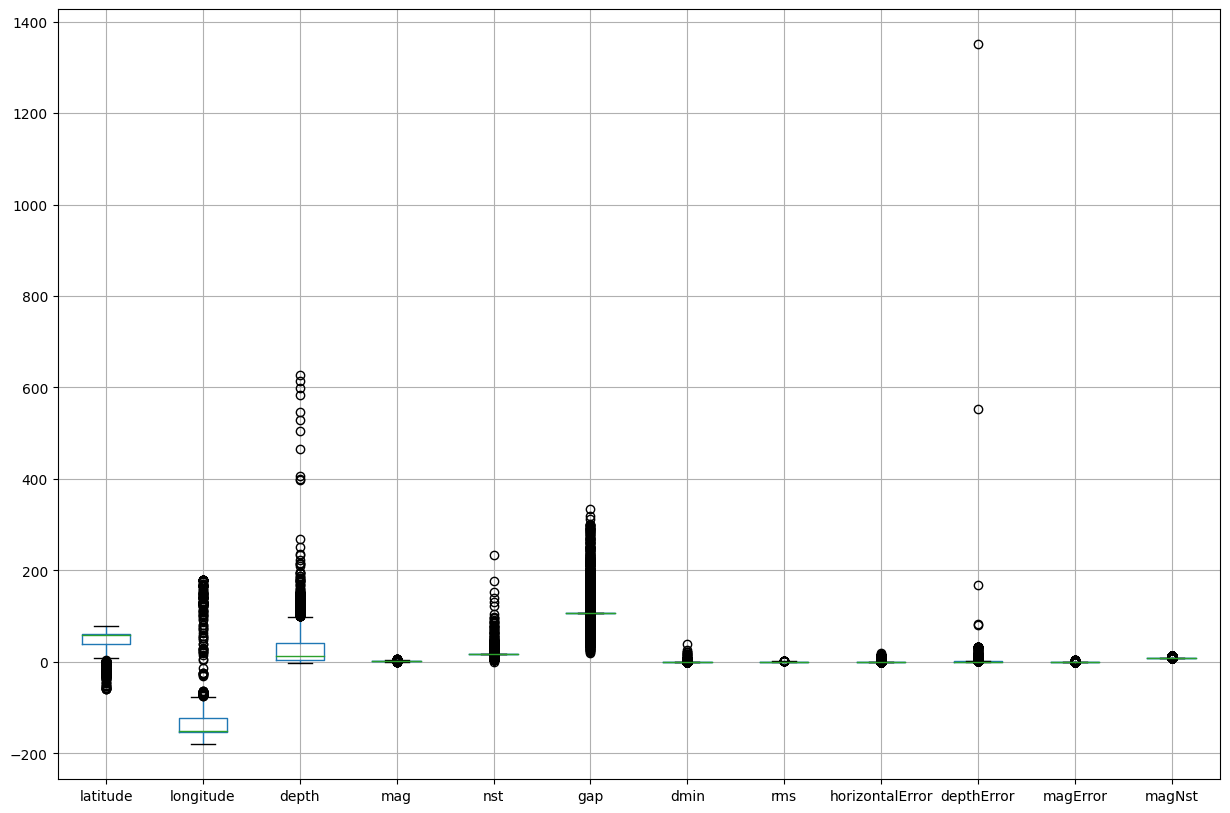

In [12]:
## Checking out the outliers
EarthquakeData.boxplot(figsize=(15,10))
plt.show()

In [13]:
## Want to check the correlation between attributes, so performing Correlation Matrix
corr_mat = EarthquakeData.corr()
corr_mat

C:\Users\User\AppData\Local\Temp\ipykernel_14744\1513787304.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = EarthquakeData.corr()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,-0.567826,-0.017072,-0.442815,-0.338661,-0.090640,-0.434093,0.285303,-0.594316,-0.028109,-0.219514,-0.365449
longitude,-0.567826,1.000000,0.038789,0.463900,0.258477,0.041327,0.410442,-0.022996,0.628748,0.016826,-0.074103,0.218512
depth,-0.017072,0.038789,1.000000,0.383790,0.202984,-0.035031,0.085701,0.201136,0.295874,0.008851,-0.035832,-0.106149
mag,-0.442815,0.463900,0.383790,1.000000,0.434739,0.086962,0.422291,0.389546,0.647639,0.035095,0.026071,0.080589
nst,-0.338661,0.258477,0.202984,0.434739,1.000000,-0.192459,0.203012,0.121822,0.260095,0.002713,0.216791,0.200958
gap,-0.090640,0.041327,-0.035031,0.086962,-0.192459,1.000000,0.011752,-0.049135,0.136749,0.025978,0.100448,-0.057566
dmin,-0.434093,0.410442,0.085701,0.422291,0.203012,0.011752,1.000000,0.119803,0.638552,0.013681,-0.029227,0.094045
rms,0.285303,-0.022996,0.201136,0.389546,0.121822,-0.049135,0.119803,1.000000,0.194244,0.002267,-0.154081,-0.249038
horizontalError,-0.594316,0.628748,0.295874,0.647639,0.260095,0.136749,0.638552,0.194244,1.000000,0.041132,-0.035695,0.137405
depthError,-0.028109,0.016826,0.008851,0.035095,0.002713,0.025978,0.013681,0.002267,0.041132,1.000000,-0.007491,-0.001924


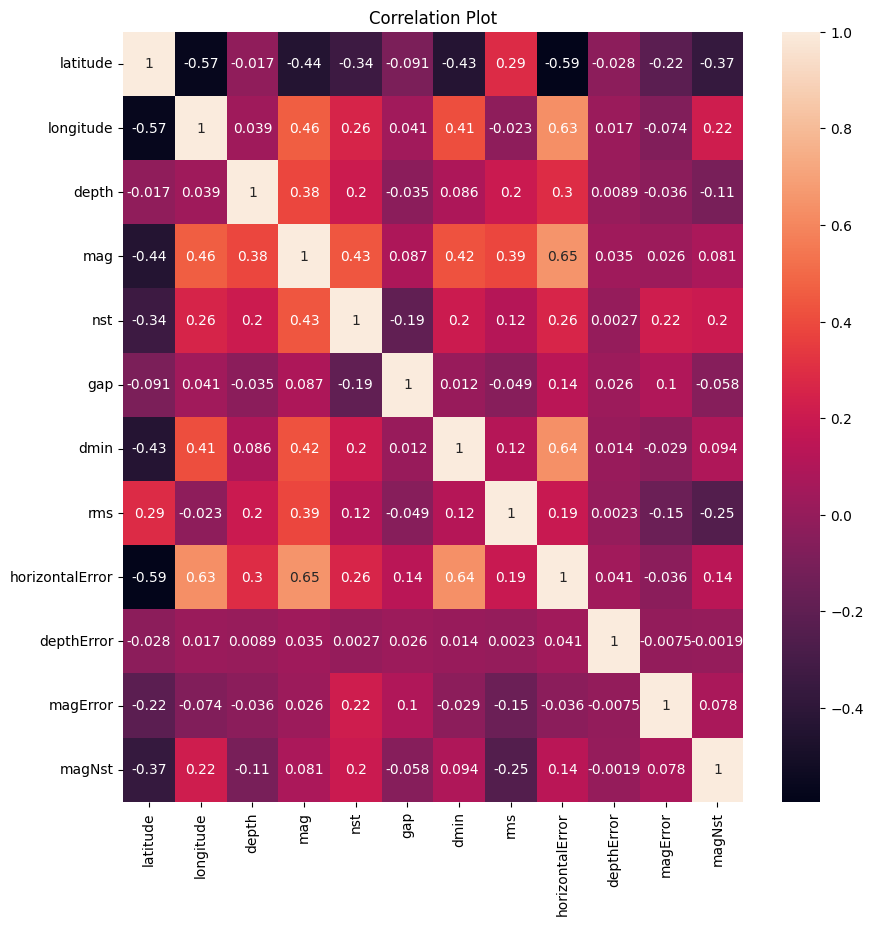

In [14]:
## heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Plot')
plt.show()

In [15]:
## From the Heatmap, we can draw some conclusions:
# - horizontalError is quite related with magnitude and longitude
# - Magnitude and latitude are inversely related
# - Magnitude and longitude are strongly related
# - Magnitude is moderately correlated with both nst and rms

Text(0.5, 29.000000000000007, 'Magnitude')

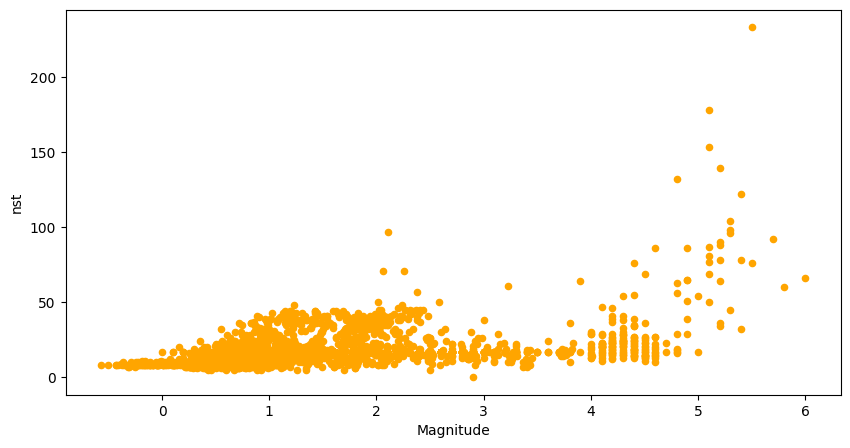

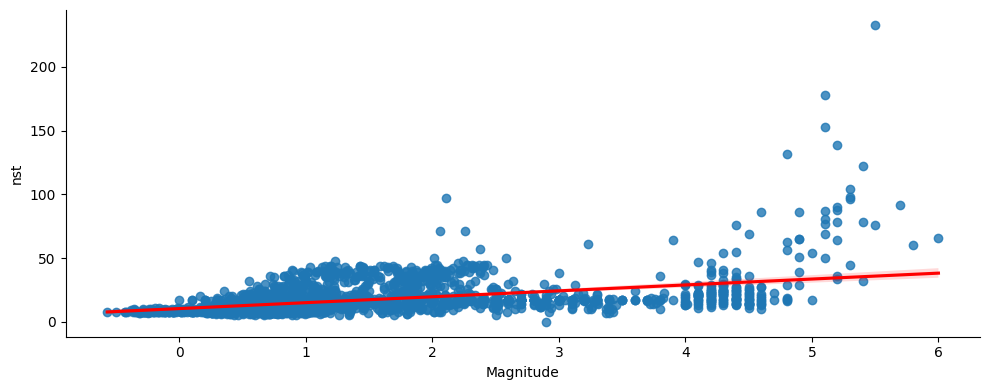

In [16]:
## Scatter plot done with matplotlib
fig, ax = plt.subplots()
EarthquakeData.plot(figsize = (10,5), kind = 'scatter', y = 'nst', x = 'mag', xlabel= 'Magnitude', ylabel = 'nst', color = 'orange', ax = ax)

## Scatter plot done with seaborn
sns.lmplot(x='mag', y='nst', data= EarthquakeData, line_kws= {'color':'red'},height=4, aspect=2.5)
plt.xlabel("Magnitude")

As seen above, scatter plots show that the greater the magnitude is, more number of stations there are

In [17]:
## Checking how distributed the data is grouped by Type
Earthquaketype = EarthquakeData.groupby(['type'])['type'].count().to_frame('count').reset_index()
Earthquaketype

,type,count
0,earthquake,4353
1,explosion,22
2,ice quake,13
3,other event,5
4,quarry blast,4


In [18]:
## Checking the distribution of the data grouped by Status 
Earthquakestatus = EarthquakeData.groupby(['status'])['status'].count().to_frame('count').reset_index()
Earthquakestatus

,status,count
0,automatic,1406
1,reviewed,2991


<AxesSubplot: ylabel='count'>

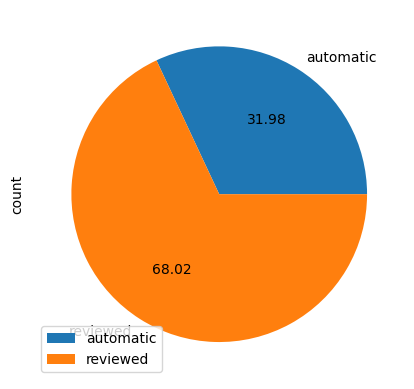

In [19]:
# Pie chart with Status count
fig, ax = plt.subplots()
Earthquakestatus.plot(kind = 'pie', y = 'count', labels = Earthquakestatus['status'], autopct = '%1.2f', ax = ax)

Picking few attributes and see their means grouped by type

In [20]:
## Performing the mean of the Magnitude grouped by Type
Earthquaketypemean = EarthquakeData.groupby(['type']).mean('mag')['mag'].to_frame('Mean Magnitude').reset_index()
Earthquaketypemean


,type,Mean Magnitude
0,earthquake,1.571250
1,explosion,1.252727
2,ice quake,1.438462
3,other event,2.220000
4,quarry blast,1.410000


<AxesSubplot: xlabel='Magnitude (Mean)'>

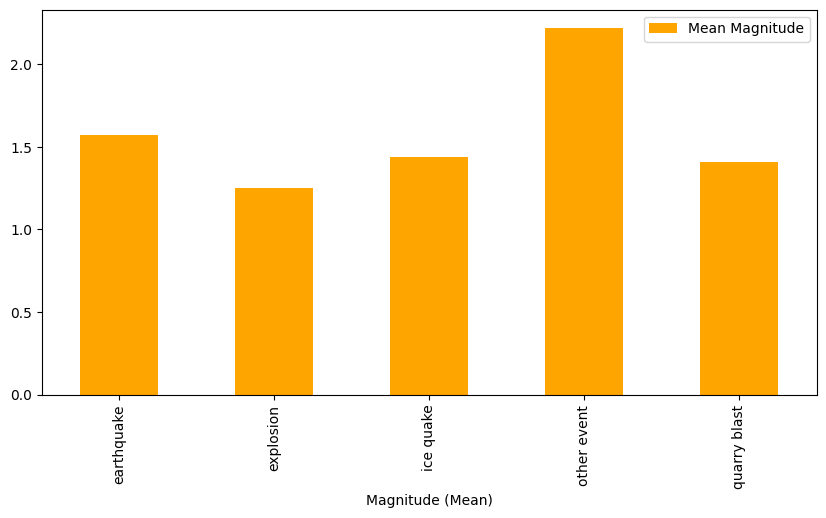

In [21]:
# Plotting a bar chart
fig, ax = plt.subplots()
Earthquaketypemean.plot(figsize = (10,5), kind = 'bar', y = 'Mean Magnitude', x = 'type', xlabel= 'Magnitude (Mean)', color = 'orange', ax = ax)

In [22]:
## Performing the mean of the Nst grouped by Type
Earthquaketypemeannst = EarthquakeData.groupby(['type']).mean('nst')['nst'].to_frame('Mean Nst').reset_index()
Earthquaketypemeannst


,type,Mean Nst
0,earthquake,17.710315
1,explosion,16.227273
2,ice quake,17.000000
3,other event,17.000000
4,quarry blast,20.750000


<AxesSubplot: xlabel='Nst (Mean)'>

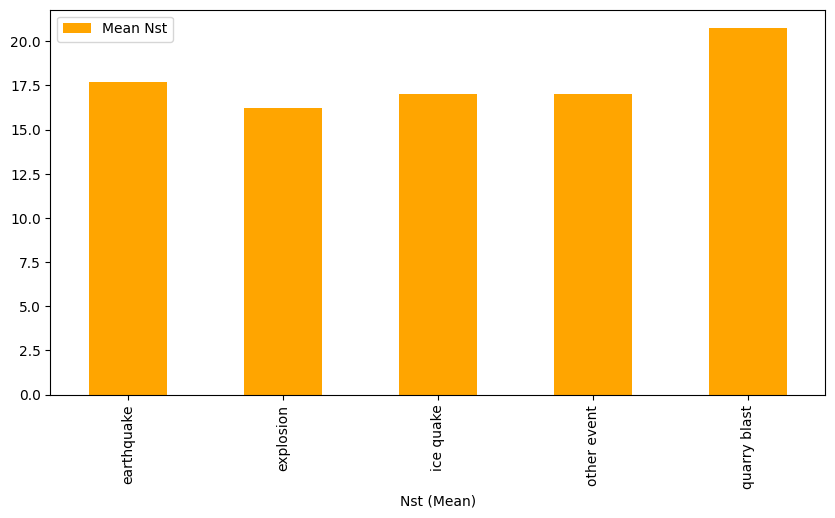

In [23]:
# Plotting a bar chart
fig, ax = plt.subplots()
Earthquaketypemeannst.plot(figsize = (10,5), kind = 'bar', y = 'Mean Nst', x = 'type', xlabel= 'Nst (Mean)', color = 'orange', ax = ax)

From the above bar charts we can extract that even though there are more seismic events for quary blast as average, other events has greater average magnitude 

In [24]:
## Converting time (datetime) column into date column
EarthquakeData['time'] = pd.to_datetime(EarthquakeData['time']).dt.date
print(EarthquakeData['time'].head())

0    2023-01-22
2    2023-01-22
4    2023-01-22
5    2023-01-22
9    2023-01-22
Name: time, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_14744\3328794611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EarthquakeData['time'] = pd.to_datetime(EarthquakeData['time']).dt.date


In [25]:
## Magnitude Mean on Time Series
MagSeries = EarthquakeData.groupby(['time']).mean('mag')['mag'].to_frame('Mean Magnitude').reset_index()
print(MagSeries)

          time  Mean Magnitude
0   2022-12-23        1.726559
1   2022-12-24        1.684745
2   2022-12-25        1.605920
3   2022-12-26        1.460833
4   2022-12-27        1.589890
5   2022-12-28        1.530457
6   2022-12-29        1.481856
7   2022-12-30        1.620744
8   2022-12-31        1.511683
9   2023-01-01        1.707095
10  2023-01-02        1.502594
11  2023-01-03        1.550036
12  2023-01-04        1.735882
13  2023-01-05        1.605658
14  2023-01-06        1.509366
15  2023-01-07        1.424662
16  2023-01-08        1.690189
17  2023-01-09        1.519647
18  2023-01-10        1.571959
19  2023-01-11        1.697411
20  2023-01-12        1.678065
21  2023-01-13        1.624433
22  2023-01-14        1.496170
23  2023-01-15        1.448692
24  2023-01-16        1.710625
25  2023-01-17        1.304649
26  2023-01-18        1.435050
27  2023-01-19        1.331961
28  2023-01-20        1.531165
29  2023-01-21        1.882637
30  2023-01-22        1.333750


<AxesSubplot: xlabel='date', ylabel='Magnitude(mean)'>

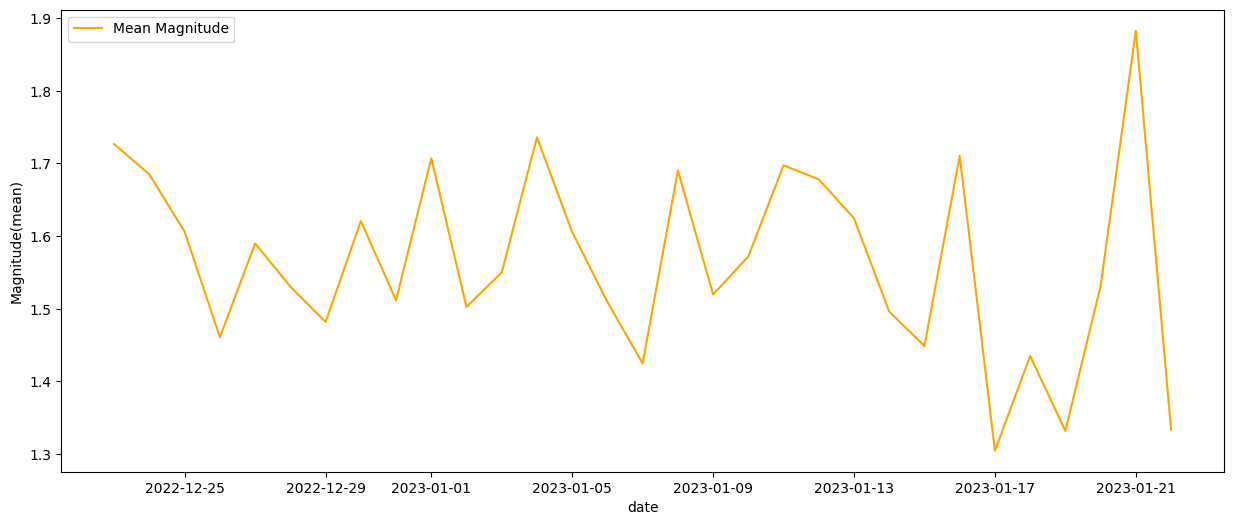

In [26]:
# Plotting a line time series to see the performance of the Magnitude mean
fig, ax = plt.subplots()
MagSeries.plot(figsize = (15,6), kind = 'line', y = 'Mean Magnitude', x = 'time', xlabel= 'date', ylabel = 'Magnitude(mean)', color = 'orange', ax = ax)

<AxesSubplot: title={'center': 'Magnitude(mean) over a month'}, xlabel='time', ylabel='Magnitude'>

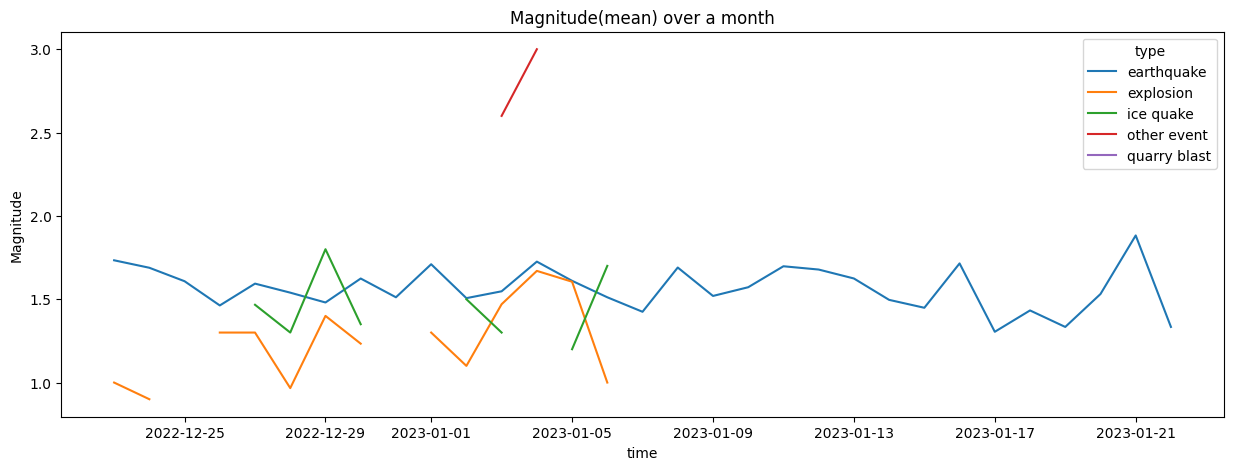

In [27]:
## Creating a line series to plot the performance of the Magnitude mean grouped by type over the time

# plot data
fig, ax = plt.subplots(figsize=(15,5))
# use unstack(). unstack is used for unstacking the grouping on the 2 columns used (time and type)
EarthquakeData.groupby(['time','type']).mean('Magnitude')['mag'].unstack().plot(ax=ax, ylabel= 'Magnitude', title= 'Magnitude(mean) over a month') 

<AxesSubplot: xlabel='time', ylabel='Count'>

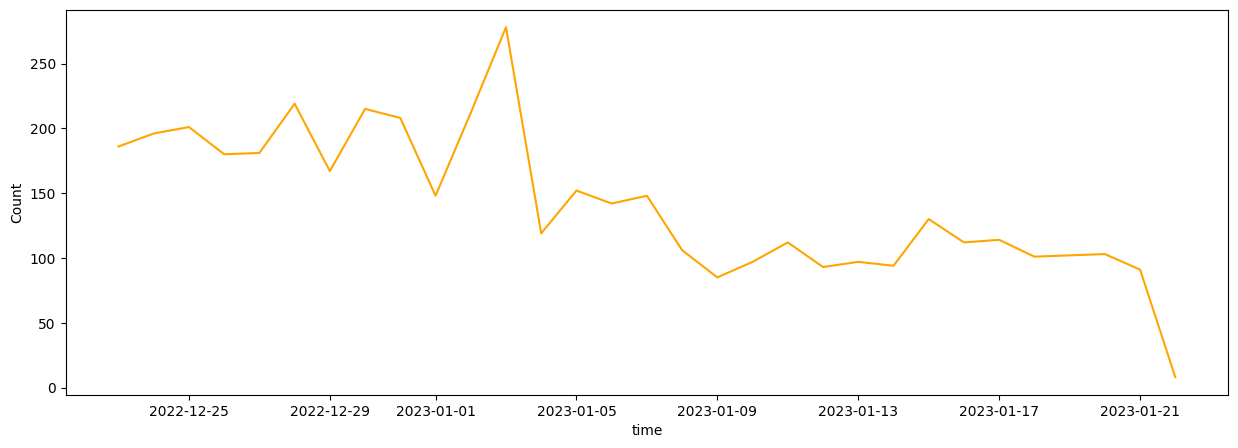

In [28]:
## Showing the representation of the count of seismic events over time

# plot data 
fig, ax = plt.subplots(figsize=(15,5))
# use unstack()
EarthquakeData.groupby(['time']).count()['status'].plot(ax=ax, color = 'orange', ylabel= 'Count')  # Just picked status because I needed to pick any column (as anyone can work for counting)

On the above time series it's drwan that there was a pick on the Magnitude mean at the end of the month. We see no clear difference between the Magnitude mean on different types, apart from having a more stable (and higher number) line on earthquakes.

Also, is clearly seen (in the last picture) that there was a declining trend on the seismic events across time.

In [29]:
EarthquakeData.groupby(['place']).mean('mag')['mag'].to_frame('Mean Magnitude').reset_index()

,place,Mean Magnitude
0,"0 km ENE of Big Lake, Alaska",1.100000
1,"0 km ESE of Avard, Oklahoma",1.590000
2,"0 km N of Funny River, Alaska",1.400000
3,"0 km NNE of Indios, Puerto Rico",2.340000
4,"0 km NNE of Pāhala, Hawaii",1.860000
...,...,...
2809,"southern Sumatra, Indonesia",4.200000
2810,southern Texas,2.500000
2811,west of Macquarie Island,5.200000
2812,western Texas,2.133333


In [49]:
# Depicting a top 5 places with biggest sum of Magnitude 
EarthquakeData.groupby(['place']).sum('mag')['mag'].to_frame('Magnitude').reset_index().sort_values('Magnitude',ascending=False).head()

,place,Magnitude
2779,Southern Alaska,173.30
2731,Central Alaska,161.10
2724,Alaska Peninsula,86.18
2744,"Island of Hawaii, Hawaii",47.34
2581,"8km NW of The Geysers, CA",35.33
